# Google Play Store App Analysis

## by Harutaka Kawamura

## Dataset Overview

> This dataset contains all the details of the applications on Google Play. There are 13 features that describe a given app. [Link](https://www.kaggle.com/lava18/google-play-store-apps/home)
- **App**: Application name
- **Category**: Category the app belongs to
- **Rating**: Overall user rating of the app (as when scraped)
- **Reviews**: Number of user reviews for the app (as when scraped)
- **Size**: Size of the app (as when scraped)
- **Installs**: Number of user downloads/installs for the app (as when scraped)
- **Type**: Paid or Free
- **Price**: Price of the app (as when scraped)
- **Content**: Rating Age group the app is targeted at - Children / Mature 21+ / Adult
- **Genres**: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- **Last Updated**: Date when the app was last updated on Play Store (as when scraped)
- **Current Ver**: Current version of the app available on Play Store (as when scraped)
- **Android Ver**: Min required Android version (as when scraped)

## Investigation Overview

> In this analysis, I focused on how **category** affect each feature.


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings

sb.set()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8, 5)

In [8]:
# load in the dataset into a pandas dataframe
save_path = 'data/googleplaystore_cleaned.csv'
df = pd.read_csv(save_path)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Rating distribution
- Average rating is 4.17.
- 65% apps are rated higher than 4.

Average rating: 4.17
Percentage of apps rated higher than 4: 65.0 %


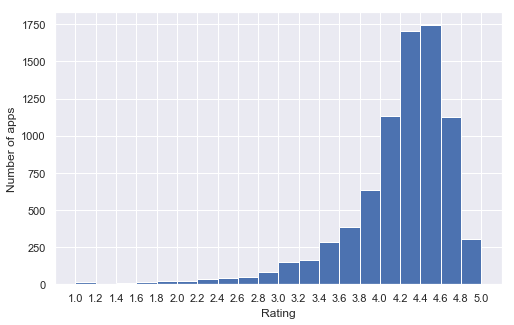

In [61]:
bins = np.arange(1, 5.1, 0.2)
df['rating'].plot.hist(bins=bins)
plt.xticks(bins)
plt.xlabel('Rating')
plt.ylabel('Number of apps')
ave_rating = df['rating'].mean().round(2)
print('Average rating:', ave_rating)
print('Percentage of apps rated higher than 4:', (df['rating'] >= 4.0).mean().round(2) * 100, '%')

## Popular Category
`family`, `game`, and `tools`, these three categories have a lot of apps.

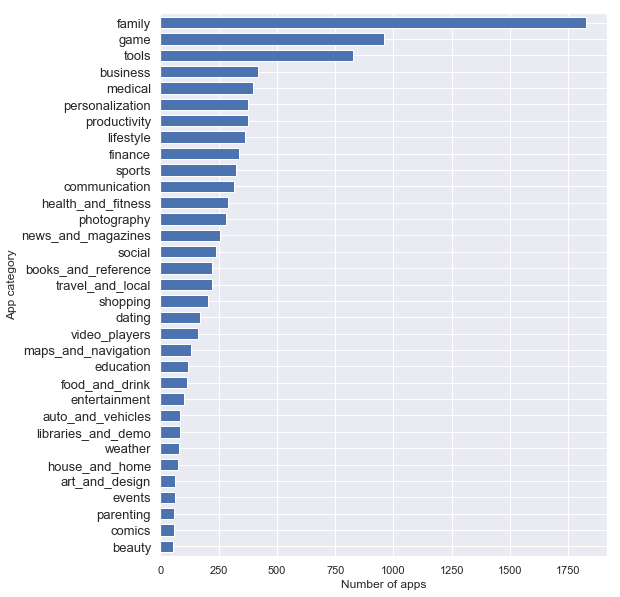

In [45]:
total = df['category'].value_counts().sort_values()
top15_categories = [x for x in total.index[-15:]]
total.plot.barh(figsize=(8, 10), color='b', width=0.7)
plt.xlabel('Number of apps')
plt.ylabel('App category')
plt.yticks(fontsize=13);

## Ratio of paid and free apps for each category
`n` in the y ticklabels represents the number of apps which belongs to the category
- `personalization` and `medical` apps tend to be paid.

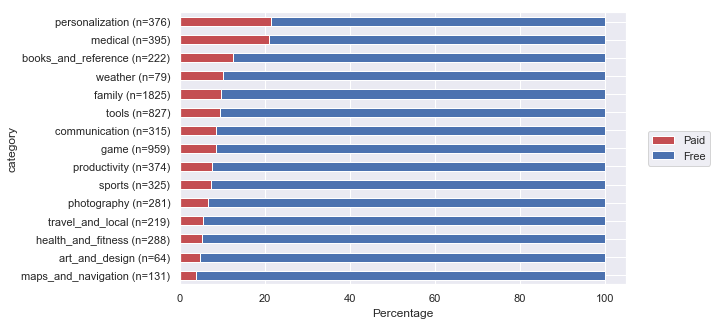

In [21]:
perc = df.groupby(['category', 'type']).size().unstack().fillna(0)
perc = perc.apply(lambda x: 100 * x / x.sum(), axis=1).sort_values('Paid').iloc[-15:, ::-1]
perc.plot.barh(stacked=True, color=['r', 'b'], figsize=(8, 5))
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center right')
locs, labels = plt.yticks()
new_labels = ['{} (n={})'.format(label.get_text(), df.groupby('category').size()[label.get_text()]) for label in labels]
plt.yticks(locs, new_labels);
plt.xlabel('Percentage');

## Price distribution for each category
- Most of paid apps are priced below $25
- `medical` and `family` apps tend to be expensive

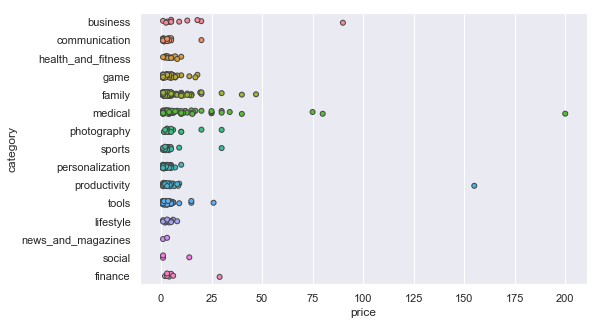

In [46]:
df_subset = df[df['price'] > 0][df['category'].isin(top15_categories)]
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sb.stripplot(x='price', y='category', data=df_subset, jitter=True, linewidth=1);

## App size distribution for each category
- For most of categories, app sizes skew to the right.
- `game`(2nd row, 1nd column) has a different distribution where the number of light apps(< 20MB) is smaller compared to other categories. This is probably because games tend to have a lot of assets(image, sound, etc.) and codes to implement complex features.

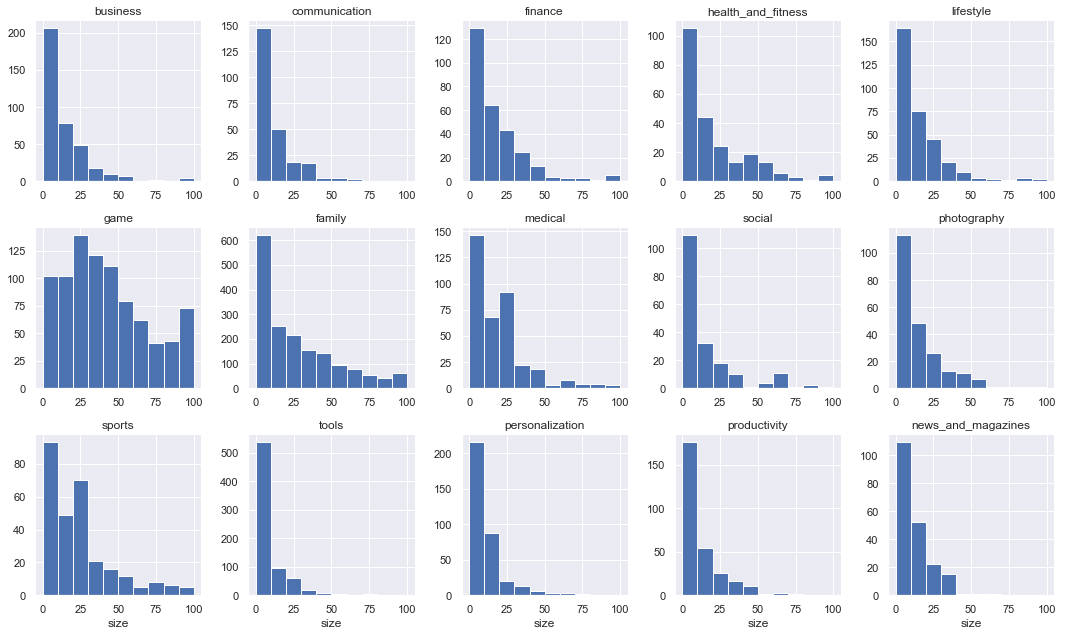

In [29]:
df_subset = df[df['category'].isin(top15_categories)]
bins = np.arange(0, 101, 10)
g = sb.FacetGrid(df_subset, col='category', col_wrap=5, sharex=False, sharey=False)
g = (g.map(plt.hist, 'size', bins=bins)).set_titles('{col_name}')

## Reviews vs Installs for each category
- Positive correlation betweent `installs` and `reviews`.
- There is no significant difference between these categories

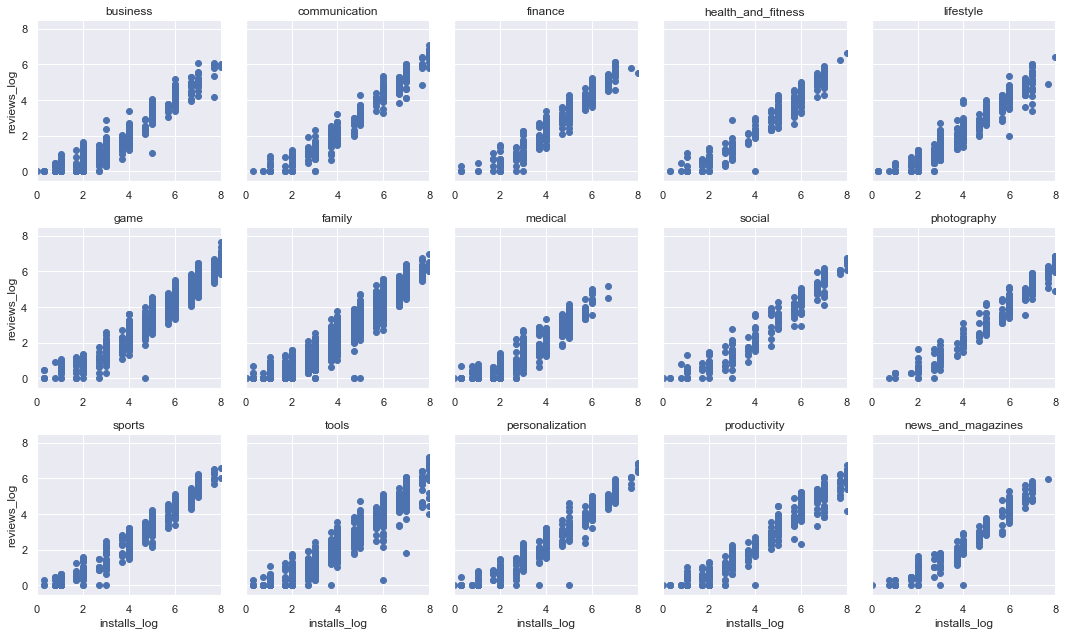

In [51]:
df_subset = df[df['category'].isin(top15_categories)]
g = sb.FacetGrid(df_subset, col='category', col_wrap=5, sharex=False)
g = (g.map(plt.scatter, 'installs_log', 'reviews_log')).set_titles('{col_name}').set(xlim=(0, 8))

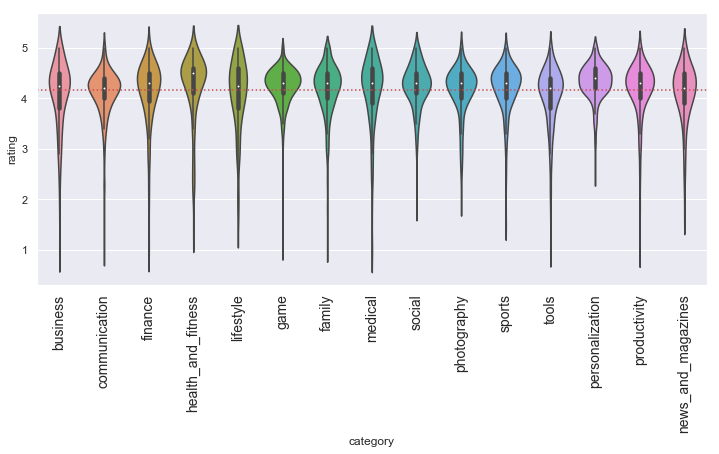

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
p = sb.violinplot(data=df[df['category'].isin(top15_categories)], x='category',y='rating')
xlim = plt.xlim()
ax.plot(xlim,(ave_rating, ave_rating), 'r:')
ax.set_xlim(*xlim)
plt.xticks(rotation=90, fontsize=14);

## Rating vs Reviews for free and paid apps
- The relationship between `rating` and `reviews` is similar (positive correlation) for free and paid apps.
- Paid apps have less reivews than free apps. This is not surprising because people are more likely to install free apps.

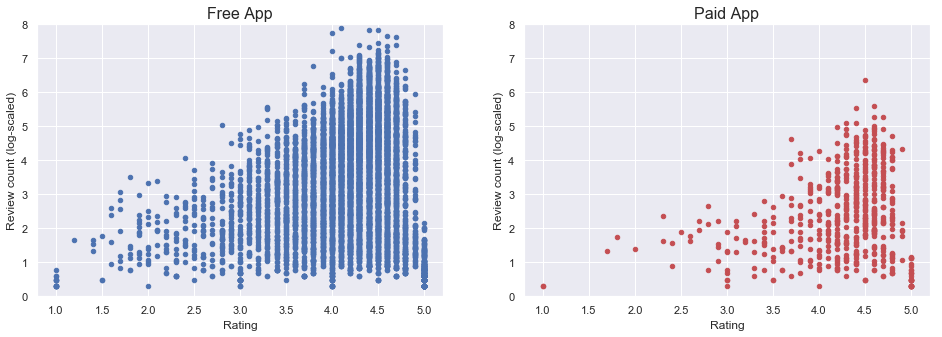

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16, 5)
df[df['price'] == 0].plot.scatter('rating', 'reviews_log', color='b', ax=ax1)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Review count (log-scaled)')
ax1.set_ylim(0, 8)
ax1.set_title('Free App', fontsize=16)
df[df['price'] > 0].plot.scatter('rating', 'reviews_log', color='r', ax=ax2)
ax2.set_ylabel('Review count (log-scaled)')
ax2.set_xlabel('Rating')
ax2.set_ylim(0, 8)
ax2.set_title('Paid App', fontsize=16);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!